# **Loading the Dataset**

In [46]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/My Drive/Prodigy_Infotech/Task3_dataset.csv'
data = pd.read_csv(file_path)
print(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married  secondary      no     1506     yes   no   
4       33   blue-collar    single  secondary      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45

In [47]:
missing_values=data.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# **Decision Tree**

In [48]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [49]:
print(data.head())
print(data.info())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular    5   may       261         1     -1         0  failure  no  
1  cellular    5   may       151         1     -1         0  failure  no  
2  cellular    5   may        76         1     -1         0  failure  no  
3  cellular    5   may        92         1     -1         0  failure  no  
4  cellular    5   may       198         1     -1         0  failure  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 column

In [50]:
data['marital'] = data['marital'].map({'married': 1, 'single': 1,'divorced':2})
print(data)

       age           job  marital  education default  balance housing loan  \
0       58    management        1   tertiary      no     2143     yes   no   
1       44    technician        1  secondary      no       29     yes   no   
2       33  entrepreneur        1  secondary      no        2     yes  yes   
3       47   blue-collar        1  secondary      no     1506     yes   no   
4       33   blue-collar        1  secondary      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45206   51    technician        1   tertiary      no      825      no   no   
45207   71       retired        2    primary      no     1729      no   no   
45208   72       retired        1  secondary      no     5715      no   no   
45209   57   blue-collar        1  secondary      no      668      no   no   
45210   37  entrepreneur        1  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previou

In [51]:
data['education'] = data['education'].map({'primary': 1, 'secondary': 2,'tertiary':3})
print(data)

       age           job  marital  education default  balance housing loan  \
0       58    management        1          3      no     2143     yes   no   
1       44    technician        1          2      no       29     yes   no   
2       33  entrepreneur        1          2      no        2     yes  yes   
3       47   blue-collar        1          2      no     1506     yes   no   
4       33   blue-collar        1          2      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45206   51    technician        1          3      no      825      no   no   
45207   71       retired        2          1      no     1729      no   no   
45208   72       retired        1          2      no     5715      no   no   
45209   57   blue-collar        1          2      no      668      no   no   
45210   37  entrepreneur        1          2      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previou

In [52]:
data['default'] = data['default'].map({'no': 0, 'yes': 1})
print(data)

       age           job  marital  education  default  balance housing loan  \
0       58    management        1          3        0     2143     yes   no   
1       44    technician        1          2        0       29     yes   no   
2       33  entrepreneur        1          2        0        2     yes  yes   
3       47   blue-collar        1          2        0     1506     yes   no   
4       33   blue-collar        1          2        0        1      no   no   
...    ...           ...      ...        ...      ...      ...     ...  ...   
45206   51    technician        1          3        0      825      no   no   
45207   71       retired        2          1        0     1729      no   no   
45208   72       retired        1          2        0     5715      no   no   
45209   57   blue-collar        1          2        0      668      no   no   
45210   37  entrepreneur        1          2        0     2971      no   no   

         contact  day month  duration  campaign  pd

In [53]:
data['housing'] = data['housing'].map({'no': 0, 'yes': 1})
print(data)

       age           job  marital  education  default  balance  housing loan  \
0       58    management        1          3        0     2143        1   no   
1       44    technician        1          2        0       29        1   no   
2       33  entrepreneur        1          2        0        2        1  yes   
3       47   blue-collar        1          2        0     1506        1   no   
4       33   blue-collar        1          2        0        1        0   no   
...    ...           ...      ...        ...      ...      ...      ...  ...   
45206   51    technician        1          3        0      825        0   no   
45207   71       retired        2          1        0     1729        0   no   
45208   72       retired        1          2        0     5715        0   no   
45209   57   blue-collar        1          2        0      668        0   no   
45210   37  entrepreneur        1          2        0     2971        0   no   

         contact  day month  duration  

In [54]:
data['loan'] = data['loan'].map({'no': 0, 'yes': 1})
print(data)

       age           job  marital  education  default  balance  housing  loan  \
0       58    management        1          3        0     2143        1     0   
1       44    technician        1          2        0       29        1     0   
2       33  entrepreneur        1          2        0        2        1     1   
3       47   blue-collar        1          2        0     1506        1     0   
4       33   blue-collar        1          2        0        1        0     0   
...    ...           ...      ...        ...      ...      ...      ...   ...   
45206   51    technician        1          3        0      825        0     0   
45207   71       retired        2          1        0     1729        0     0   
45208   72       retired        1          2        0     5715        0     0   
45209   57   blue-collar        1          2        0      668        0     0   
45210   37  entrepreneur        1          2        0     2971        0     0   

         contact  day month

In [68]:
data['age_class'] = np.where(data['age'] > 30, 1, 0)
target = 'age_class'
features = ['marital', 'education']
print(features)

['marital', 'education']


In [69]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [70]:
tree = DecisionTreeClassifier()
tree.fit(data_train[features], data_train[target])
predictions = tree.predict(data_test[features])
print("Predictions:", predictions)
print("Actual values:", data_test[target].values)


Predictions: [1 1 1 ... 1 1 1]
Actual values: [1 1 0 ... 1 1 1]


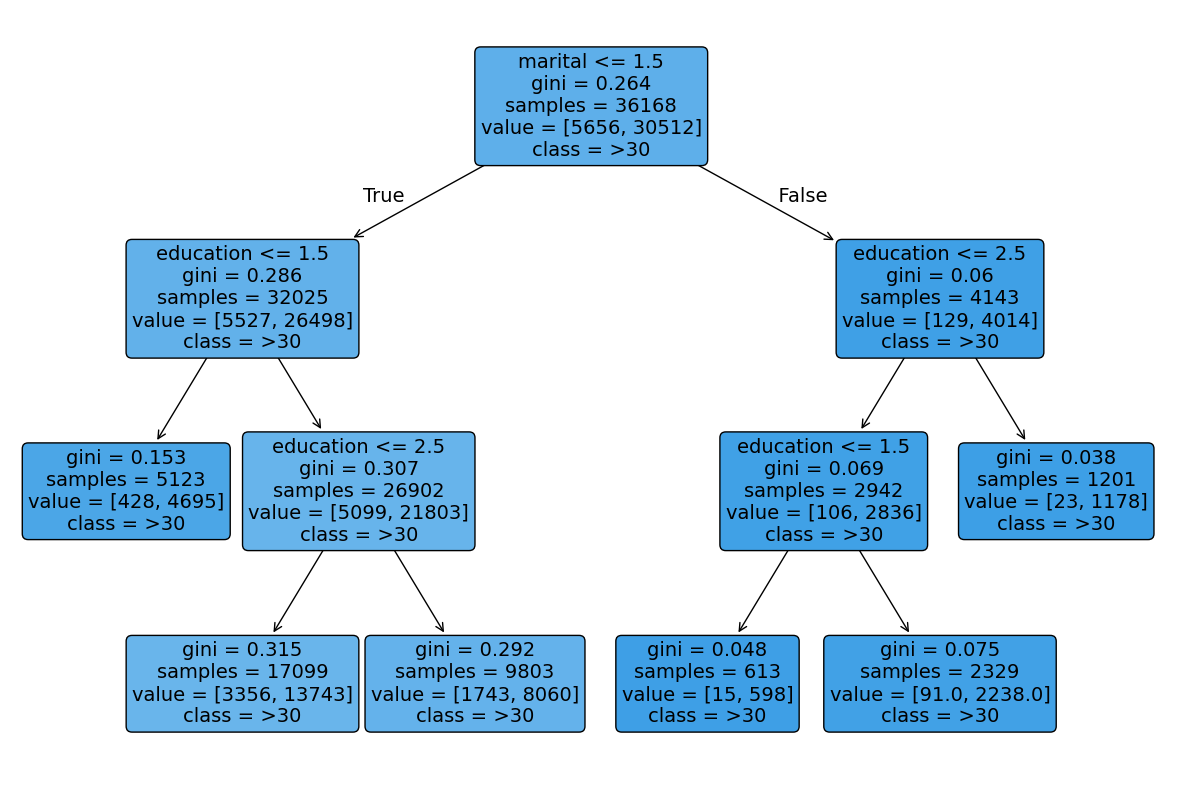

In [72]:

plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=features, class_names=['<=30', '>30'], filled=True, rounded=True)
plt.show()